Theoretical Questions

1. What is Boosting in Machine Learning?

Answer:

Boosting is an ensemble learning technique that combines multiple weak learners (usually simple models like decision stumps) sequentially to create a strong learner. Each new model focuses on correcting the errors made by the previous models, thus improving overall performance.

2. How does Boosting differ from Bagging?

Answer:

Aspect	Bagging	Boosting
Approach	Parallel ensemble of independent models	Sequential ensemble where models depend on previous models
Error focus	Reduces variance by averaging predictions	Reduces bias by focusing on hard-to-predict samples
Sampling	Random sampling with replacement (bootstrap)	Weighted sampling focusing on misclassified samples
Models	Models built independently	Models built sequentially, each correcting previous errors

3. What is the key idea behind AdaBoost?

Answer:

The key idea behind AdaBoost (Adaptive Boosting) is to iteratively train weak classifiers on the weighted training data, where weights increase for misclassified samples, forcing subsequent classifiers to focus more on difficult cases. Finally, all classifiers are combined by weighted majority voting.

4. Explain the working of AdaBoost with an example.

Answer:

Working of AdaBoost:

Initialize weights uniformly on training samples.

Train a weak learner on the weighted samples.

Calculate error rate of the learner.

Compute learner’s weight based on error (more weight for better learners).

Update sample weights: increase weights for misclassified samples, decrease for correctly classified.

Repeat for several iterations.

Final prediction: weighted vote of all learners.

Example:

Suppose you have 10 samples. Initially, each has weight 0.1. The first weak learner misclassifies samples 3 and 7. Their weights are increased so the next learner pays more attention to them. This process repeats, and learners focus on harder samples progressively.

5. What is Gradient Boosting, and how is it different from AdaBoost?

Answer:

Gradient Boosting builds models sequentially by fitting each new model to the negative gradient (residual errors) of the loss function with respect to the current ensemble prediction, optimizing a loss function explicitly.

Difference:

AdaBoost adjusts sample weights and focuses on misclassified points.

Gradient Boosting fits new models to minimize residual errors based on gradients of a differentiable loss function.

6. What is the loss function in Gradient Boosting?

Answer:

The loss function is problem-dependent. For example:

Regression: Mean Squared Error (MSE)

Classification: Logarithmic loss (log-loss or deviance)
Gradient Boosting fits weak learners to minimize this loss by gradient descent in function space.

7. How does XGBoost improve over traditional Gradient Boosting?

Answer:

XGBoost adds:

Regularization (L1 and L2) to reduce overfitting.

Parallel and distributed computing for faster training.

Tree pruning and handling of missing values.

Weighted quantile sketch for efficient split finding.

Supports custom objective and evaluation functions.

Overall, XGBoost is faster, more regularized, and scalable.

8. What is the difference between XGBoost and CatBoost?

Answer:

Aspect	XGBoost	CatBoost
Handling Categorical Features	Requires manual encoding (one-hot, label encoding)	Natively supports categorical features using efficient encoding
Speed and Efficiency	Fast, optimized for numeric data	Also fast, optimized for categorical and heterogeneous data
Overfitting Prevention	Regularization and pruning	Ordered boosting to reduce prediction shift
Ease of Use	Powerful, but requires parameter tuning	Easier for categorical data, fewer hyperparameters to tune

9. What are some real-world applications of Boosting techniques?

Answer:

Fraud detection in finance

Customer churn prediction

Credit scoring and risk analysis

Medical diagnosis and prognosis

Image classification

Web search ranking

Recommender systems

10. How does regularization help in XGBoost?

Answer:

Regularization (L1, L2) controls model complexity by penalizing large weights, helping prevent overfitting, improving generalization on unseen data.

11. What are some hyperparameters to tune in Gradient Boosting models?

Answer:

Number of estimators (trees)

Learning rate

Maximum depth of trees

Minimum samples per leaf

Subsample ratio

Loss function

Regularization parameters (L1, L2)

12. What is the concept of Feature Importance in Boosting?

Answer:

Feature importance quantifies how useful or valuable each feature was in the construction of boosting trees. It helps identify which features influence the model most, aiding interpretation and feature selection.

13. Why is CatBoost efficient for categorical data?

Answer:

CatBoost uses ordered target statistics and efficient encoding techniques to handle categorical variables directly without preprocessing. This reduces overfitting and preserves information that manual encoding might lose.



In [6]:
#14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset for classification
data = load_breast_cancer()
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(data.data, data.target, random_state=42)

model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train_clf, y_train_clf)
y_pred_clf = model.predict(X_test_clf)

print("AdaBoost Classifier Accuracy:", accuracy_score(y_test_clf, y_pred_clf))

#15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

# Generate regression dataset
X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, random_state=42)

model_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
model_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = model_reg.predict(X_test_reg)

print("AdaBoost Regressor MAE:", mean_absolute_error(y_test_reg, y_pred_reg))

#16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

model_gb_clf = GradientBoostingClassifier(random_state=42)
# Use the classification data for training the classifier
model_gb_clf.fit(X_train_clf, y_train_clf)

importance = pd.Series(model_gb_clf.feature_importances_, index=data.feature_names)
print("Feature Importances:\n", importance.sort_values(ascending=False))

#17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model_gb_reg = GradientBoostingRegressor(random_state=42)
# Use the regression data for training the regressor
model_gb_reg.fit(X_train_reg, y_train_reg)
y_pred_gb_reg = model_gb_reg.predict(X_test_reg)

print("Gradient Boosting Regressor R^2 Score:", r2_score(y_test_reg, y_pred_gb_reg))

AdaBoost Classifier Accuracy: 0.958041958041958
AdaBoost Regressor MAE: 24.209437786315153
Feature Importances:
 mean concave points        0.474561
worst concave points       0.236670
worst radius               0.068548
worst texture              0.051598
worst area                 0.044148
worst perimeter            0.027386
mean texture               0.017909
worst concavity            0.016513
concavity error            0.012890
concave points error       0.009276
area error                 0.008869
radius error               0.007097
texture error              0.006477
worst smoothness           0.004098
mean compactness           0.002820
compactness error          0.001933
fractal dimension error    0.001743
symmetry error             0.001494
smoothness error           0.001359
worst symmetry             0.001092
mean radius                0.000889
worst compactness          0.000668
perimeter error            0.000583
mean perimeter             0.000493
mean symmetry          

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier

# Exercise 18: Compare XGBoost Classifier with Gradient Boosting Classifier
print("\n--- Exercise 18: XGBoost vs Gradient Boosting Classifier ---")
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_clf, y_train_clf)
gb_preds = gb_clf.predict(X_test_clf)
print("Gradient Boosting Accuracy:", accuracy_score(y_test_clf, gb_preds))

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_clf, y_train_clf)
xgb_preds = xgb_clf.predict(X_test_clf)
print("XGBoost Accuracy:", accuracy_score(y_test_clf, xgb_preds))


--- Exercise 18: XGBoost vs Gradient Boosting Classifier ---
Gradient Boosting Accuracy: 0.958041958041958
XGBoost Accuracy: 0.958041958041958


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:45:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
# Exercise 19: CatBoost Classifier with F1 Score Evaluation
print("\n--- Exercise 19: CatBoost Classifier with F1 Score ---")
catboost_clf = CatBoostClassifier(verbose=0, random_state=42)
catboost_clf.fit(X_train_clf, y_train_clf)
cat_preds = catboost_clf.predict(X_test_clf)
print("CatBoost F1 Score:", f1_score(y_test_clf, cat_preds))






--- Exercise 19: CatBoost Classifier with F1 Score ---
CatBoost F1 Score: 0.9832402234636871


In [21]:
# Exercise 20: XGBoost Regressor with Mean Squared Error
print("\n--- Exercise 20: XGBoost Regressor with MSE ---")
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train_reg, y_train_reg)
xgb_reg_preds = xgb_regressor.predict(X_test_reg)
print("XGBoost Regressor Mean Squared Error:", mean_squared_error(y_test_reg, xgb_reg_preds))



--- Exercise 20: XGBoost Regressor with MSE ---
XGBoost Regressor Mean Squared Error: 1062.743415683085



--- Exercise 21: AdaBoost Feature Importance Visualization ---


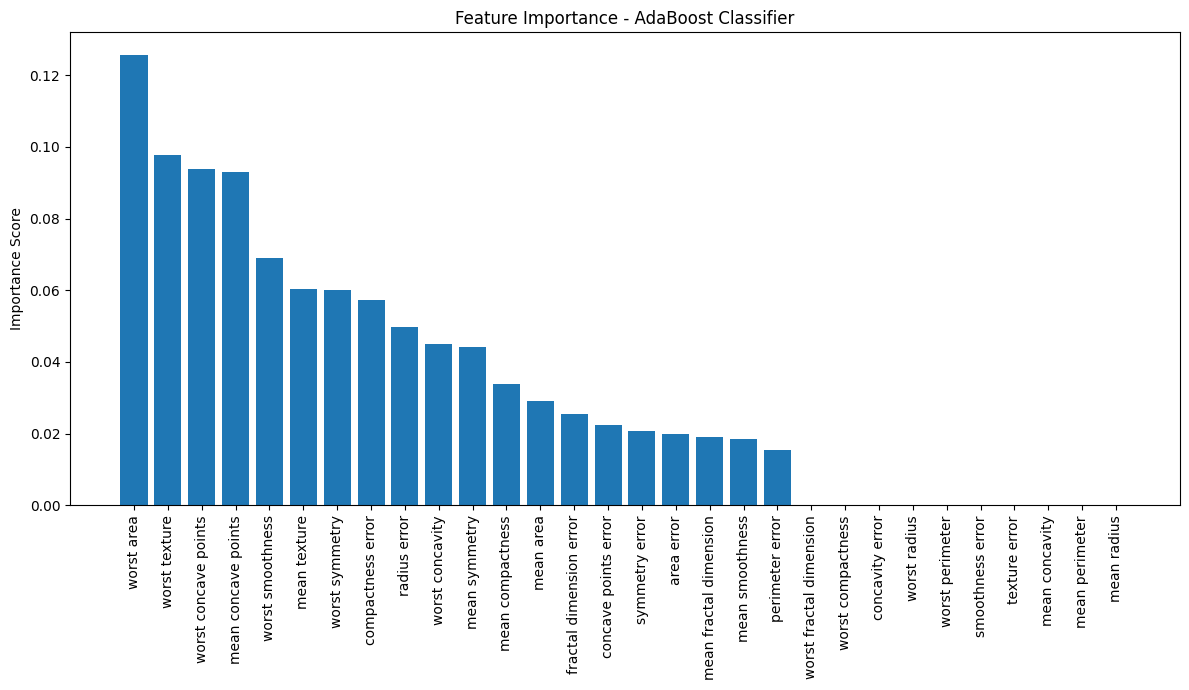

In [24]:
# Exercise 21: AdaBoost Classifier Feature Importance Visualization
print("\n--- Exercise 21: AdaBoost Feature Importance Visualization ---")
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train_clf, y_train_clf)

# Extract feature importances
importances = ada_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Define feature_names_clf from the loaded classification data
feature_names_clf = data.feature_names

# Plot
plt.figure(figsize=(12, 7))
plt.bar(range(len(importances)), importances[indices])
# Use the correctly defined feature_names_clf
plt.xticks(range(len(importances)), np.array(feature_names_clf)[indices], rotation=90)
plt.title("Feature Importance - AdaBoost Classifier")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

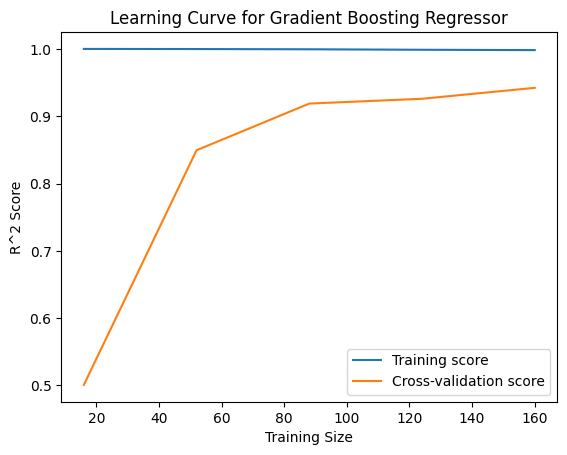

In [14]:
#22. Train a Gradient Boosting Regressor and plot learning curves.

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Assuming X and y from make_regression are the intended variables for this section
# If not, ensure the correct regression data variables (e.g., X_reg, y_reg) are used.
# In the context provided, X and y from ipython-input-5/6 are regression data.
# Use the regression data (X_reg, y_reg) explicitly for the regressor learning curve
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(random_state=42), X_reg, y_reg, cv=5, scoring='r2', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('R^2 Score')
plt.title('Learning Curve for Gradient Boosting Regressor')
plt.legend()
plt.show()



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:44:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


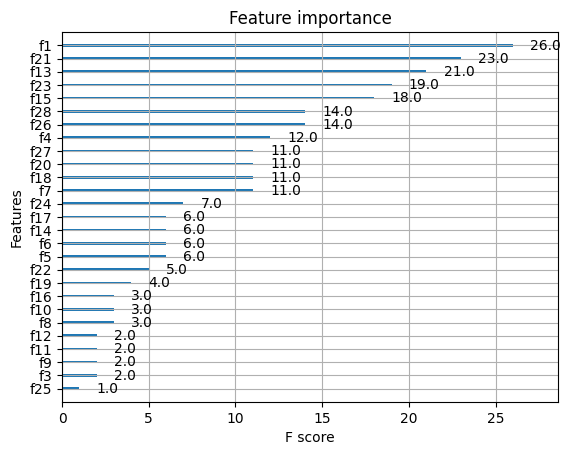

In [18]:
#23. Train an XGBoost Classifier and visualize feature importance.

# Ensure xgb is imported
import xgboost as xgb

# Use the classification data (X_train_clf, y_train_clf) for the classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Correctly use the classification training data
xgb_model.fit(X_train_clf, y_train_clf)
# You might need the feature names for visualization if you're plotting manually,
# but xgb.plot_importance handles numerical features directly.
xgb.plot_importance(xgb_model)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00


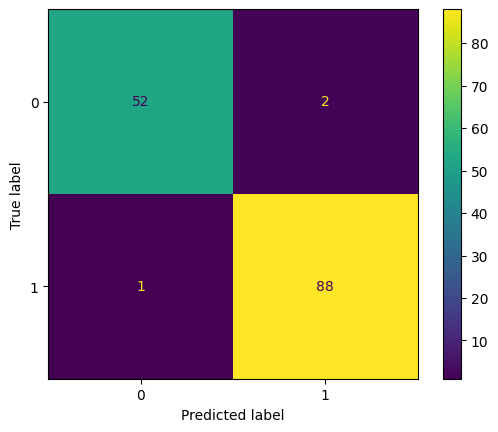

In [17]:
# Install the catboost library
!pip install catboost

# Now you can import CatBoostClassifier and the rest of the code should run
from sklearn.metrics import ConfusionMatrixDisplay
from catboost import CatBoostClassifier

# Use the classification data (X_train_clf, y_train_clf, X_test_clf, y_test_clf) for the classifier
cat_model = CatBoostClassifier(verbose=0, random_state=42)
# Correctly use the classification training data
cat_model.fit(X_train_clf, y_train_clf)
# Correctly use the classification test data for prediction and plotting
y_pred_cat = cat_model.predict(X_test_clf)

# Correctly use the classification test data for plotting
ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_cat)
plt.show()

In [15]:
#25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

# Ensure AdaBoostClassifier and accuracy_score are imported
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Use the classification data (X_train_clf, y_train_clf, X_test_clf, y_test_clf) for the classifier
estimators = [10, 50, 100, 200]
for n in estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    # Correctly use the classification training data
    model.fit(X_train_clf, y_train_clf)
    # Correctly use the classification test data for prediction and accuracy calculation
    y_pred_ada = model.predict(X_test_clf)
    # Correctly use the classification test data for accuracy calculation
    print(f"Estimators: {n}, Accuracy: {accuracy_score(y_test_clf, y_pred_ada):.4f}")

Estimators: 10, Accuracy: 0.9720
Estimators: 50, Accuracy: 0.9580
Estimators: 100, Accuracy: 0.9790
Estimators: 200, Accuracy: 0.9790


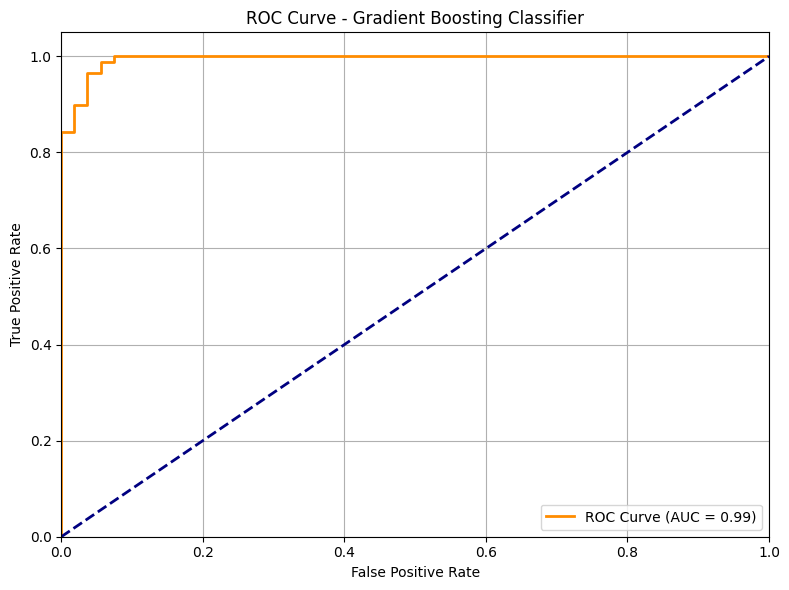

In [27]:
#26 Train a Gradient Boosting Classifier and visualize the ROC curve.

from sklearn.metrics import roc_curve, auc


import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

# Ensure you're using classification data
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_clf, y_train_clf)

# Get predicted probabilities for the positive class
y_score = model.predict_proba(X_test_clf)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_clf, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


In [26]:
#27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
xgb_reg = xgb.XGBRegressor(random_state=42)

grid = GridSearchCV(xgb_reg, param_grid=params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best learning rate:", grid.best_params_['learning_rate'])
print("Best CV score (MSE):", -grid.best_score_)

#28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Generate imbalanced dataset
X_imb, y_imb = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, random_state=42)

# Without class weighting
cat_model1 = CatBoostClassifier(verbose=0, random_state=42)
cat_model1.fit(X_train, y_train)
pred1 = cat_model1.predict(X_test)

# With class weighting
cat_model2 = CatBoostClassifier(class_weights=[1, 9], verbose=0, random_state=42)
cat_model2.fit(X_train, y_train)
pred2 = cat_model2.predict(X_test)

print("Without class weighting:\n", classification_report(y_test, pred1))
print("With class weighting:\n", classification_report(y_test, pred2))

#29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

learning_rates = [0.01, 0.1, 0.5, 1]
for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob', random_state=42)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)

print("Multi-class Log Loss:", log_loss(y_test, y_pred_prob))

Best learning rate: 0.2
Best CV score (MSE): 1201.4918180386373
Without class weighting:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       226
           1       1.00      0.58      0.74        24

    accuracy                           0.96       250
   macro avg       0.98      0.79      0.86       250
weighted avg       0.96      0.96      0.96       250

With class weighting:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       226
           1       0.71      0.71      0.71        24

    accuracy                           0.94       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.94      0.94      0.94       250

Learning Rate: 0.01, Accuracy: 0.9040
Learning Rate: 0.1, Accuracy: 0.9360
Learning Rate: 0.5, Accuracy: 0.9360
Learning Rate: 1, Accuracy: 0.9480
Multi-class Log Loss: 0.009282532825768382


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:48:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
